# Анализ факторов, влияющих на оценку заказа

Одним из основных показателей удовлетворенности клиента компании в сфере e-commerce являются отзывы или оценки. 
Оценки заказов, оценки товаров, оценки сервиса помогают пользователям выбирать хорошие товары, повышают лояльность пользователей к компании.
С другой стороны, мониторинг оценок позволяет компании в сфере e-commerce выявлять и устранять проблемы, связанные с пользовательским опытом. Такие действия способствуют развитию компании, повышению репутацию, и как следствие увеличивают основные финансовые показатели.
Именно поэтому работа с оценками является крайне важной для любой компании, так или иначе связанной с e-commerce.

В данном ноутбуке мы анализируем влияние различных факторов на оценку заказа.  

**Цель** — выявить закономерности и сделать выводы, полезные для бизнеса.

Общая структура исследования представлена ниже:
##### 1. Предварительный общий анализ оценок заказов
##### 2. Анализ влияния статуса заказа на оценку заказа
##### 3. Анализ влияния задержки доставки на оценку
##### 4. Анализ влияния стоимости заказа на его оценку
##### 5. Анализ влияния категории товара на его оценку

## 1. Предварительный общий анализ оценок заказов

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

### Загрузка данных

Данные взяты из набора **Brazilian E-Commerce Public Dataset by Olist**.

**Источник:** [Olist Dataset на Kaggle](https://www.kaggle.com/datasets/olistbr/brazilian-ecommerce)

Для удобства работы датасет загружен в мой **GitHub**-репозиторий: [Ссылка на файлы](https://github.com/kirill-kachanov/e-commerce_analysis/tree/main)

Основные таблицы, которые мы будем использовать:
- `orders`: информация о заказах (номер заказа, статус заказа, дата заказа, ожидаемая дата доставки, фактическая дата доставки и т.д.)
- `order_reviews`: информация об отзывах по заказу (номер заказа, номер отзыва, оценка и т.д.)
- `order_items`: информация о товарах, входящих в заказ (номер заказа, номер продукта, цена продукта, цена доставки и т.д.)
- `eng_category_name`: информация о переводе категории товара с португальского на английский.
- `products`: информация о товарах (номер продукта, категория продукта, высота, ширина, длина и т.д.)

In [3]:
# Загружаем необходимые для анализа таблицы
orders = pd.read_csv('https://raw.githubusercontent.com/kirill-kachanov/e-commerce_analysis/refs/heads/main/raw_data/olist_orders_dataset.csv')
order_reviews = pd.read_csv('https://raw.githubusercontent.com/kirill-kachanov/e-commerce_analysis/refs/heads/main/raw_data/olist_order_reviews_dataset.csv')
order_items = pd.read_csv('https://raw.githubusercontent.com/kirill-kachanov/e-commerce_analysis/refs/heads/main/raw_data/olist_order_items_dataset.csv')
eng_category_name = pd.read_csv('https://raw.githubusercontent.com/kirill-kachanov/e-commerce_analysis/refs/heads/main/raw_data/product_category_name_translation.csv')
products = pd.read_csv('https://raw.githubusercontent.com/kirill-kachanov/e-commerce_analysis/refs/heads/main/raw_data/olist_products_dataset.csv')

### Проведение общего анализа

In [5]:
orders.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [7]:
order_reviews.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


In [9]:
# Объединяем таблицу с заказами с таблицей с отзывами для дальнейшего использования
orders_w_reviews = orders.merge(right=order_reviews[['review_id', 'order_id', 'review_score', 'review_creation_date']], how='inner', on='order_id')
orders_w_reviews.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,a54f0611adc9ed256b57ede6b6eb5114,4,2017-10-11 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00,8d5266042046a06655c8db133d120ba5,4,2018-08-08 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00,e73b67b67587f7644d5bd1a52deb1b01,5,2018-08-18 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00,359d03e676b3c069f62cadba8dd3f6e8,5,2017-12-03 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00,e50934924e227544ba8246aeb3770dd4,5,2018-02-17 00:00:00


In [11]:
orders_w_reviews.describe()

,review_score
count,99224.000000
mean,4.086421
std,1.347579
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


По короткому описанию распределения оценок сразу можно предположить, что оценки 4 и 5 преобладают, тк они составляют как минимум 3/4 от всех оценок. 

In [13]:
orders_w_reviews.nunique()

order_id                         98673
customer_id                      98673
order_status                         8
order_purchase_timestamp         98115
order_approved_at                90082
order_delivered_carrier_date     80451
order_delivered_customer_date    95022
order_estimated_delivery_date      459
review_id                        98410
review_score                         5
review_creation_date               636
dtype: int64

Видим, что некоторые оценки по заказам дублируются, поэтому придется удалить дубликаты. При этом более репрезентативной оценкой будет являться последняя, так как клиент мог изменить свою оценку после использования товара. 

In [19]:
# Сортируем данные и удаляем дубликаты
orders_w_reviews = orders_w_reviews.sort_values(by='review_creation_date')
orders_w_reviews.drop_duplicates(subset='order_id', keep='last', inplace=True)

In [21]:
orders_w_reviews.info()

<class 'pandas.core.frame.DataFrame'>
Index: 98673 entries, 10068 to 45095
Data columns (total 11 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       98673 non-null  object
 1   customer_id                    98673 non-null  object
 2   order_status                   98673 non-null  object
 3   order_purchase_timestamp       98673 non-null  object
 4   order_approved_at              98518 non-null  object
 5   order_delivered_carrier_date   96927 non-null  object
 6   order_delivered_customer_date  95830 non-null  object
 7   order_estimated_delivery_date  98673 non-null  object
 8   review_id                      98673 non-null  object
 9   review_score                   98673 non-null  int64 
 10  review_creation_date           98673 non-null  object
dtypes: int64(1), object(10)
memory usage: 9.0+ MB


Посмотрим на распределение оценок с помощью гистограммы.

Мы видим, что распределение оценок сильно смещено к оценке "пять". Это кажется логичным, так как в большинстве случаев клиенты ставят максимальные оценки, если всё прошло хорошо.

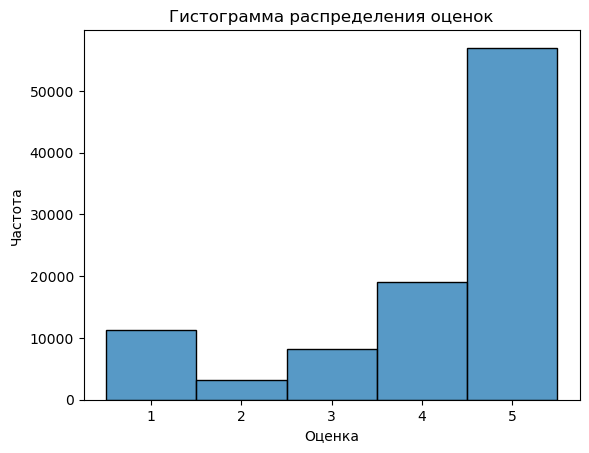

In [23]:
sns.histplot(data=orders_w_reviews, x='review_score', discrete=True, bins=5)
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Гистограмма распределения оценок')
plt.show()

In [25]:
# Для наглядности рассчитаем частоту появления каждой оценки
orders_w_reviews['review_score'].value_counts(normalize=True) * 100

review_score
5    57.774670
4    19.298086
1    11.515815
3     8.243390
2     3.168040
Name: proportion, dtype: float64

### Вывод по разделу

По итогу мы видим, что хоть оценки 4 и 5 составляют 77% от общего количество оценок, но этого может оказаться недостаточно для покупателей. В связи с этим необходимо провести несколько исследований, чтобы выяснить причины наличия плохих оценок. К плохим будем относить оценки от 1 до 3

## 2. Анализ влияния статуса заказа на оценку заказа

Предположим, что покупатели ставят плохие оценки при наличии статусов `canceled` и `unavailable`. Это можно объяснить тем, что они отказываются от доставки, например из-за качества товара или срока доставки, и ставят плохую оценку. Или отсутствие ясности в статусе заказа способствует постановке негативной оценки. 

Заказы с такими статусами можно объединить в категорию "негативные". Все остальные статусы можно определить в категорию "позитивные".
В связи с этим проанализируем связь оценок и "негативных" заказов.

### Подготовка данных к анализу

Для начала создадим дополнительный столбец, где разделим все заказы на две категории "негативные" и "позитивные".

Для этого используем бинарную кодировку, где 1 - это "негативные" заказы (`order_status == 'canceled'` или `order_status == 'unavailable'`), 0 - это "позитивные" заказы (все остальные статусы).

In [27]:
orders_w_reviews['is_negative'] = orders_w_reviews['order_status'].apply(lambda x: 1 if x == 'canceled' or x == 'unavailable' else 0)

### Проведение анализа

In [29]:
# Рассчитываем основные описательные статистики
orders_w_reviews.groupby('is_negative', as_index=False)['review_score'].agg(['mean', 'median', 'count', 'std'])

,is_negative,mean,median,count,std
0,0,4.116309,5.0,97473,1.321085
1,1,1.663333,1.0,1200,1.268068


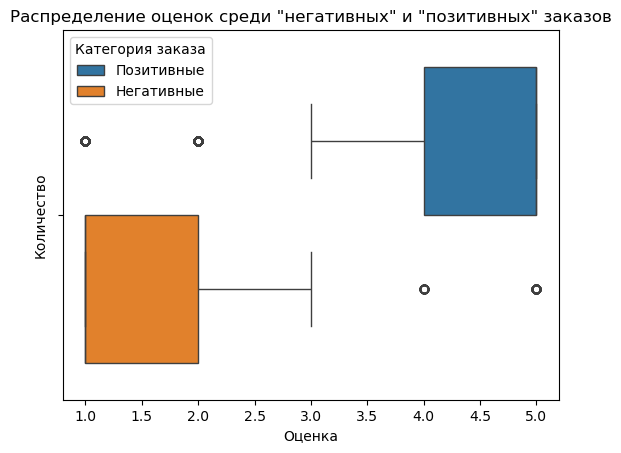

In [31]:
# Строим box-plot по двум категориям
sns.boxplot(data=orders_w_reviews, x='review_score', hue='is_negative')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.title('Распределение оценок среди "негативных" и "позитивных" заказов')
plt.legend(['Позитивные', "Негативные"], title='Категория заказа')
plt.show()

Построив box-plot, а также рассчитав основные описательные статистики мы видим, что потенциально существуют значимые различия между оценками у двух категорий статусов заказа.

Сформулируем гипотезы и используем статистический критерий для проверки этой гипотезы.

**Гипотезы:**

**H0**: Оценка заказа не зависит от категории статуса заказа.

**H1**: Оценка заказа зависит от категории статуса заказа.

**Опишем основные параметры исследуемых данных:**

- две группы для исследования (оценки заказов с "негативными" и "позитивными" статусами)
- данные не подчиняются нормальному распределению;
- группы независимые (каждый заказ относится только к одной категории статуса);
- оценки представлены в ранговой шкале (дискретные значения от 1 до 5).

**Вывод:** Так как у нас две независимые выборки с не-нормальным распределением, то для проверки гипотезы используем критерий Манна–Уитни. 

In [33]:
# Сформируем две исследуемые группы
negative_scores = orders_w_reviews[orders_w_reviews['is_negative'] == 1]['review_score']
positive_scores = orders_w_reviews[orders_w_reviews['is_negative'] == 0]['review_score']

In [35]:
u_stat, p_value = stats.mannwhitneyu(negative_scores, positive_scores)
if p_value < 0.05:
    print(f'P_value: {p_value:.2f}')
    print('Существует статистически значимое различие между оценками, отвергаем Н0')
else:
    print(f'P_value: {p_value:.2f}')
    print('Cтатистически значимое различие между оценками отсутствует, не отвергаем Н0')   

P_value: 0.00
Существует статистически значимое различие между оценками, отвергаем Н0


### Вывод по разделу

По итогу мы делаем вывод, что есть статистически значимые различия между оценками в зависимости от категории статуса заказа.
В связи с чем компании стоит углубиться в анализ и попытаться разобраться в причинах отмена/недоступности заказов.
Если причины получится устранить, то это потенциальная зона роста для увеличения оценок.

## 3. Анализ влияния задержки доставки на оценку

### Подготовка данных к анализу  

Воспользуемся подходом, аналогичным предыдущему кейсу.

Создадим дополнительный столбец `is_delayed`, где 1 отметим заказы у которых `order_delivered_customer_date` > `order_estimated_delivery_date`.
Также не стоит забывать тот факт, что заказы могут просрочены уже на этапе доставки, то есть имея статус заказа `shipped`, значение `order_delivered_carrier_date` будет больше `order_estimated_delivery_date`. Такие значения мы тоже отметим 1.

Также для корректного анализа влияния задержки доставки на оценку заказа нам необходимо удалить строки, в которых отсутствует информация о фактической дате доставки `order_delivered_customer_date`.  

##### **Почему мы исключаем эти данные?**  
1. **Анализируем влияние факта задержки**  
   - Нас интересует, как именно задержка доставки влияет на оценку. Это возможно только в случае, если заказ был доставлен или находится в пути, но уже просрочен.  

2. **Некорректные значения в случае отмены и недоступности заказа**
   - Если заказ был отменен (`canceled`) или оказался недоступным (`unavailable`), даты доставки у него нет и быть не может.
   - Если заказ находится на стадии обработки, подтверждения или в пути и дата каждой из этих стадий меньше, чем ожидаемая дата доставки, то такие заказы анализировать некорректно.  
   - В связи с чем оставление таких данных в выборке может исказить результаты анализа, так как их оценки могут быть поставлены не за сам процесс доставки, а по другим причинам.

##### **Вывод**  
Мы удаляем заказы, у которых `order_delivered_customer_date` отсутствует (`NaT`) и `is_delayed == 0`, так как они не несут полезной информации для анализа задержек доставки.

In [37]:
# Предварительно преобразуем столбцы с датами в формат datetime
orders_w_reviews['order_delivered_customer_date'] = pd.to_datetime(orders_w_reviews['order_delivered_customer_date'], errors='coerce')
orders_w_reviews['order_estimated_delivery_date'] = pd.to_datetime(orders_w_reviews['order_estimated_delivery_date'], errors='coerce')
orders_w_reviews['order_delivered_carrier_date'] = pd.to_datetime(orders_w_reviews['order_delivered_carrier_date'], errors='coerce')

In [39]:
# Создаем столбец, где будем отмечать задержки в доставке
orders_w_reviews['is_delayed'] = 0

In [41]:
# Доставлены, но с задержкой
orders_w_reviews.loc[(orders_w_reviews['order_delivered_customer_date'] > orders_w_reviews['order_estimated_delivery_date']), 'is_delayed'] = 1

In [43]:
# Не доставлены, но уже задержаны на этапе погрузки
orders_w_reviews.loc[(orders_w_reviews['order_delivered_carrier_date'] > orders_w_reviews['order_estimated_delivery_date']) & (orders_w_reviews['order_status'] == 'shipped'), 'is_delayed'] = 1

In [45]:
# Удаляем некорректные для анализа значения
orders_w_reviews_delivered = orders_w_reviews.loc[~((orders_w_reviews['order_delivered_customer_date'].isnull()) & (orders_w_reviews['is_delayed'] == 0))]

In [47]:
orders_w_reviews_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,is_negative,is_delayed
30661,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1,2016-10-06 00:00:00,0,1
46389,9aa3197e4887919fde0307fc23601d7a,31a4ecf0bd3ea9436b7132bac1a1bdb3,delivered,2016-10-06 13:16:56,2016-10-06 16:06:59,2016-10-14 18:08:17,2016-10-17 19:08:17,2016-11-28,b2d5d8db2a841d27a72e4c06c6212368,4,2016-10-15 00:00:00,0,0
27449,e2144124f98f3bf46939bc5183104041,bd0342f59a3b8ddc416bd048b2b5d0fb,delivered,2016-10-06 20:06:26,2016-10-08 11:00:24,2016-10-12 11:00:25,2016-10-15 11:00:25,2016-11-28,743d98b1a4782f0646898fc915ef002a,4,2016-10-15 00:00:00,0,0
13705,b8b9d7046c083150cb5360b83a8ebb51,ec271753df25bad1135a375ed6d7f113,delivered,2016-10-06 12:51:54,2016-10-06 16:05:19,2016-10-15 12:24:17,2016-10-18 13:24:17,2016-11-28,53752edb26544dd41c1209f582c9c589,5,2016-10-16 01:00:00,0,0
4462,85841af0d94e5d0cd3a9c0e42e565b74,603dd05a409bcfe63ca922996c72bdfb,delivered,2016-10-05 22:39:46,2016-10-06 16:03:32,2016-10-10 16:03:33,2016-10-13 16:03:33,2016-11-25,b2fc2fac36fdef519925b2f55a95d8e4,5,2016-10-18 00:00:00,0,0


### Проведение анализа

In [49]:
# Рассчитываем основные описательные статистики
orders_w_reviews_delivered.groupby('is_delayed', as_index=False)['review_score'].agg(['mean', 'median', 'count', 'std'])

,is_delayed,mean,median,count,std
0,0,4.294098,5.0,88168,1.147261
1,1,2.564537,2.0,7670,1.658619


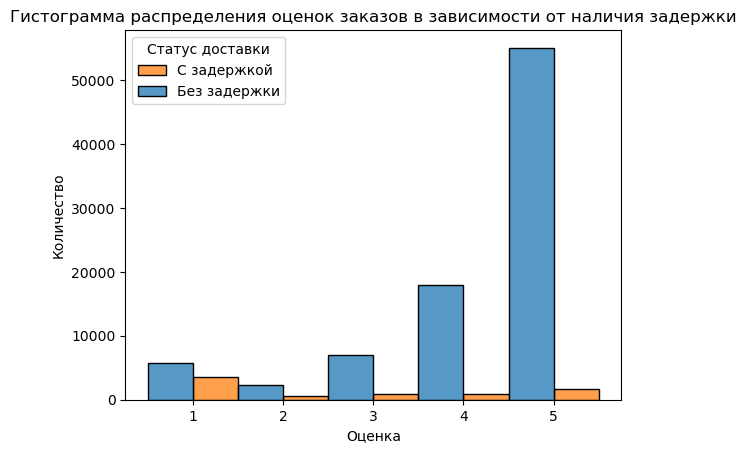

In [51]:
# Строим гистограмму распределения
sns.histplot(data=orders_w_reviews_delivered, hue='is_delayed', x='review_score', discrete=True, multiple='dodge')
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.title('Гистограмма распределения оценок заказов в зависимости от наличия задержки')
plt.legend(['С задержкой', "Без задержки"], title='Статус доставки')
plt.show()

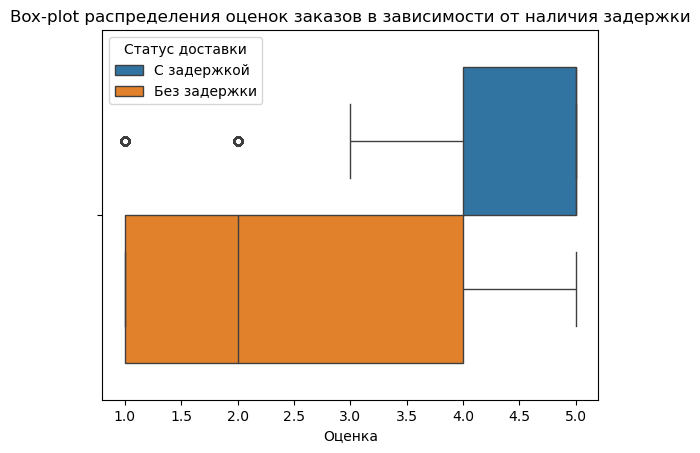

In [53]:
# Строим box-plot
sns.boxplot(data=orders_w_reviews_delivered, hue='is_delayed', x='review_score')
plt.xlabel('Оценка')
plt.title('Box-plot распределения оценок заказов в зависимости от наличия задержки')
plt.legend(['С задержкой', "Без задержки"], title='Статус доставки')
plt.show()

#### Предварительные выводы
На основе проведенного выше анализа мы можем сделать вывод о том, что:
1. Данные не соответствуют нормальному распределению. Перекос идет либо в сторону оценки `5` у заказов без задержки, либо в сторону оценки `1` у заказов с задержкой.
2. Среднее и медианное значение у двух групп сильно отличаются друг от друга.

Исходя из вышесказанного, сформулируем следующие гипотезы.

**Гипотезы:**

**Н0:** Оценка заказа не зависит от задержки заказа.

**Н1:** Оценка заказа зависит от задержки заказа.

Так как у нас две независимые выборки с не-нормальным распределением, то для проверки гипотез используем критерий Манна–Уитни. 

In [55]:
# Сформируем две исследуемые группы
delay_scores = orders_w_reviews_delivered[orders_w_reviews_delivered['is_delayed'] == 1]['review_score']
non_delay_scores = orders_w_reviews_delivered[orders_w_reviews_delivered['is_delayed'] == 0]['review_score']

In [57]:
u_stat, p_value = stats.mannwhitneyu(delay_scores, non_delay_scores)
if p_value < 0.05:
    print(f'P_value: {p_value:.2f}')
    print('Существует статистически значимое различие между оценками, отвергаем Н0')
else:
    print(f'P_value: {p_value:.2f}')
    print('Cтатистически значимое различие между оценками отсутствует, не отвергаем Н0')   

P_value: 0.00
Существует статистически значимое различие между оценками, отвергаем Н0


### Вывод по разделу
По итогу мы делаем вывод, что есть статистические значимые различия между оценками в зависимости от наличия задержки заказа. Вероятно, клиенты придают большое значение срокам доставки. В связи с чем компании стоит проанализировать и разобраться в причинах задержек заказов. Если причины можно устранить, то это потенциальная зона роста для увеличения оценок.

## 4. Анализ влияния стоимости заказа на его оценку

### Подготовка данных к анализу

В случае если мы говорим о влиянии цены на оценку заказа, то обычно мы руководствуемся принципом цена-качество. Если нас не устраивает качество товара при его высокой стоимости, то обычно пользователи ставят низкую оценку. Обратная ситуация такая же. Все это говорит нам о том, что влияние стоимости товара на его оценку проявляется только в случае получения и использования данного товара.

В связи с этим, мы отфильтруем данные таким образом, что оставим только доставленные заказы.

In [59]:
# Оставляем только доставленные заказы
orders_w_reviews_delivered = orders_w_reviews[~orders_w_reviews['order_delivered_customer_date'].isnull()]

In [61]:
orders_w_reviews_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,is_negative,is_delayed
30661,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1,2016-10-06 00:00:00,0,1
46389,9aa3197e4887919fde0307fc23601d7a,31a4ecf0bd3ea9436b7132bac1a1bdb3,delivered,2016-10-06 13:16:56,2016-10-06 16:06:59,2016-10-14 18:08:17,2016-10-17 19:08:17,2016-11-28,b2d5d8db2a841d27a72e4c06c6212368,4,2016-10-15 00:00:00,0,0
27449,e2144124f98f3bf46939bc5183104041,bd0342f59a3b8ddc416bd048b2b5d0fb,delivered,2016-10-06 20:06:26,2016-10-08 11:00:24,2016-10-12 11:00:25,2016-10-15 11:00:25,2016-11-28,743d98b1a4782f0646898fc915ef002a,4,2016-10-15 00:00:00,0,0
13705,b8b9d7046c083150cb5360b83a8ebb51,ec271753df25bad1135a375ed6d7f113,delivered,2016-10-06 12:51:54,2016-10-06 16:05:19,2016-10-15 12:24:17,2016-10-18 13:24:17,2016-11-28,53752edb26544dd41c1209f582c9c589,5,2016-10-16 01:00:00,0,0
4462,85841af0d94e5d0cd3a9c0e42e565b74,603dd05a409bcfe63ca922996c72bdfb,delivered,2016-10-05 22:39:46,2016-10-06 16:03:32,2016-10-10 16:03:33,2016-10-13 16:03:33,2016-11-25,b2fc2fac36fdef519925b2f55a95d8e4,5,2016-10-18 00:00:00,0,0


In [63]:
# В связи с тем, что в заказе могут быть несколько товаров, возьмем среднюю стоимость заказа
order_mean_price = order_items.groupby('order_id', as_index=False)['price'].mean()

In [65]:
# Объединяем таблицы для дальнейшего анализа
orders_w_reviews_delivered = orders_w_reviews_delivered.merge(right=order_mean_price, how='inner', on='order_id')

In [67]:
orders_w_reviews_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,is_negative,is_delayed,price
0,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1,2016-10-06 00:00:00,0,1,44.99
1,9aa3197e4887919fde0307fc23601d7a,31a4ecf0bd3ea9436b7132bac1a1bdb3,delivered,2016-10-06 13:16:56,2016-10-06 16:06:59,2016-10-14 18:08:17,2016-10-17 19:08:17,2016-11-28,b2d5d8db2a841d27a72e4c06c6212368,4,2016-10-15 00:00:00,0,0,25.90
2,e2144124f98f3bf46939bc5183104041,bd0342f59a3b8ddc416bd048b2b5d0fb,delivered,2016-10-06 20:06:26,2016-10-08 11:00:24,2016-10-12 11:00:25,2016-10-15 11:00:25,2016-11-28,743d98b1a4782f0646898fc915ef002a,4,2016-10-15 00:00:00,0,0,39.90
3,b8b9d7046c083150cb5360b83a8ebb51,ec271753df25bad1135a375ed6d7f113,delivered,2016-10-06 12:51:54,2016-10-06 16:05:19,2016-10-15 12:24:17,2016-10-18 13:24:17,2016-11-28,53752edb26544dd41c1209f582c9c589,5,2016-10-16 01:00:00,0,0,107.99
4,85841af0d94e5d0cd3a9c0e42e565b74,603dd05a409bcfe63ca922996c72bdfb,delivered,2016-10-05 22:39:46,2016-10-06 16:03:32,2016-10-10 16:03:33,2016-10-13 16:03:33,2016-11-25,b2fc2fac36fdef519925b2f55a95d8e4,5,2016-10-18 00:00:00,0,0,22.90


### Проведение анализа

Анализ начнем с визуализации. Воспользуемся двумя видами графиком **box-plot** и **KDE-plot**.

**Box-plot** позволяет выявить различия в распределении цен между оценками. На этом графике следует обратить внимание на медианы, межквартильные размахи, наличие выбросов.

**KDE-plot** помогает визуализировать плотность распределения цен в каждой группе оценок. При common_norm=False можно оценить реальное соотношение количества заказов по разным ценам для каждой оценки.

**Логарифмирование цен**

Так как ценовой диапазон заказов очень широкий, применяем логарифмирование цены перед построением графиков.

**Box-plot** без логарифмирования получался неинформативным из-за длинного "хвоста" у дорогих заказов. После логарифмирования медианы и межквартильные размахи стали лучше различимы.

**KDE-plot** без логарифмирования показывал резкий пик на низких значениях цены и длинный "хвост" в сторону дорогих заказов. Логарифмирование улучшило визуализацию, сгладив распределение.

Логарифмирование помогает уменьшить влияние выбросов и улучшить читаемость графиков, но не изменяет общий характер зависимости между ценой и оценкой.

In [69]:
# Логарифмируем цену
orders_w_reviews_delivered['log_price'] = np.log1p(orders_w_reviews_delivered['price'])

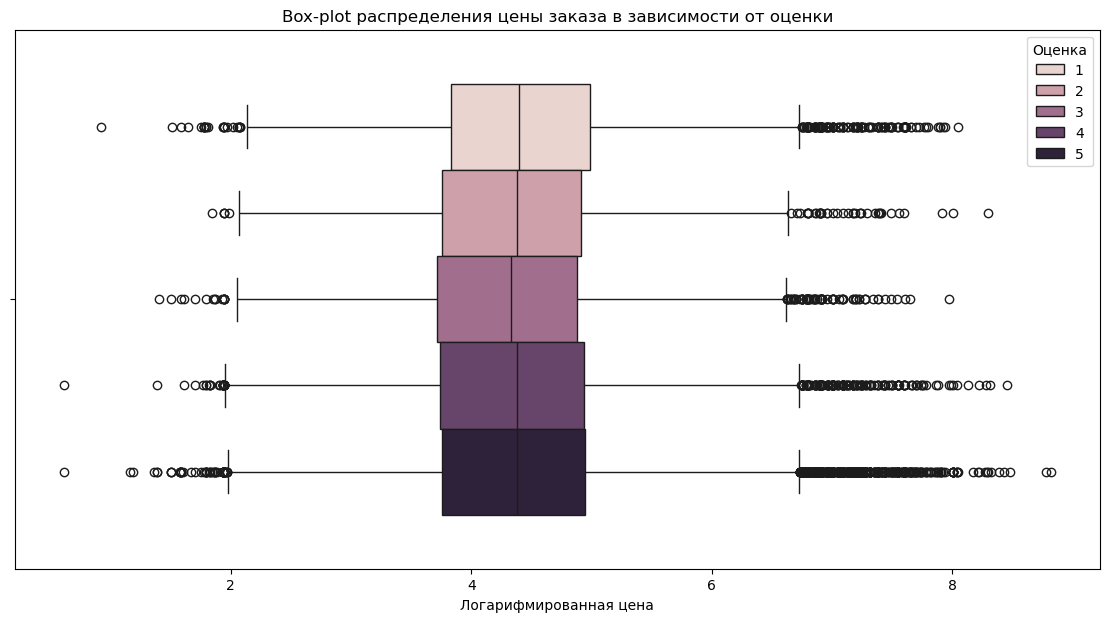

In [71]:
# Строим box-plot
plt.figure(figsize=(14, 7))
sns.boxplot(data=orders_w_reviews_delivered, x="log_price", hue="review_score")
plt.xlabel('Логарифмированная цена')
plt.title('Box-plot распределения цены заказа в зависимости от оценки')
plt.legend(title='Оценка')
plt.show()

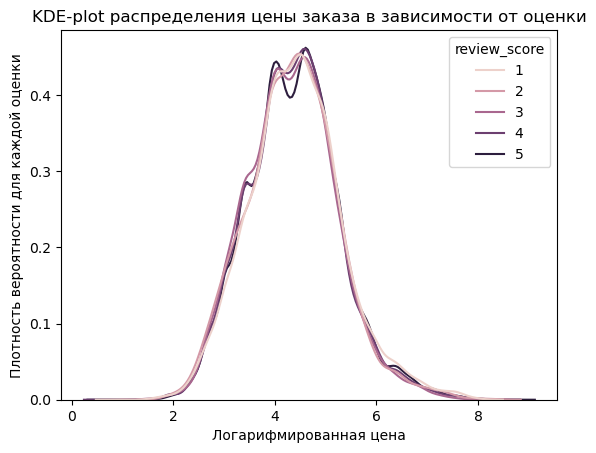

In [73]:
ax = sns.kdeplot(data=orders_w_reviews_delivered, x="log_price", hue="review_score", common_norm=False)
plt.xlabel('Логарифмированная цена')
plt.ylabel('Плотность вероятности для каждой оценки')
plt.title('KDE-plot распределения цены заказа в зависимости от оценки')
plt.show()

#### Дополнительное тестирование значений на нормальность

На основе визуализаций, таких как **KDE-plot** и **box-plot**, мы можем предположить, что распределение цен в зависимости от оценки может отличаться от нормального распределения. Наблюдаемая бимодальность и большие хвосты в распределении могут указывать на отклонения от нормальности.

Для более точной проверки мы решили дополнительно провести статистические тесты на нормальность для трех групп цен в зависимости от оценки:
- **Тест Шапиро-Уилка (Shapiro-Wilk)**: Применен для группы с оценкой 2 (2916 наблюдений).
- **Тест Колмогорова-Смирнова (K-S)**: Применен для группы с оценкой 3 (7918 наблюдений).
- **Тест Андерсона-Дарлинга (A-D)**: Применен для группы с оценкой 5 (56750 наблюдений).

Результаты тестов позволят нам объективно оценить, насколько логарифмированные цены внутри каждой оценки соответствуют нормальному распределению, и скорректировать дальнейший анализ, если нормальность не подтверждается. 

In [75]:
orders_w_reviews_delivered.groupby('review_score')['log_price'].count()

review_score
1     9354
2     2916
3     7918
4    18892
5    56750
Name: log_price, dtype: int64

In [77]:
# Формируем группы для теста на нормальность
reviews_del_shapiro = orders_w_reviews_delivered[orders_w_reviews_delivered['review_score'] == 2]['log_price']
reviews_del_ks = orders_w_reviews_delivered[orders_w_reviews_delivered['review_score'] == 3]['log_price']
reviews_del_anderson = orders_w_reviews_delivered[orders_w_reviews_delivered['review_score'] == 5]['log_price']

In [79]:
result_rev_shapiro = stats.shapiro(reviews_del_shapiro)
print(f"Тест Шапиро-Уилка (Для цен с оценкой '2'): statistic={result_rev_shapiro.statistic:.5f}, p-value={result_rev_shapiro.pvalue:.5f}")
if result_rev_shapiro.pvalue < 0.05:
    print("Распределение цен отличное от нормального")
else:
    print("Распределение цен соответствует нормальному")

Тест Шапиро-Уилка (Для цен с оценкой '2'): statistic=0.99126, p-value=0.00000
Распределение цен отличное от нормального


In [81]:
result_rev_ks = stats.kstest(reviews_del_ks, 'norm')
print(f"Тест Колмогорова-Смирнова (Для цен с оценкой '3'): statistic={result_rev_ks.statistic:.5f}, p-value={result_rev_ks.pvalue:.5f}")
if result_rev_ks.pvalue < 0.05:
    print("Распределение цен отличное от нормального")
else:
    print("Распределение цен соответствует нормальному")

Тест Колмогорова-Смирнова (Для цен с оценкой '3'): statistic=0.98536, p-value=0.00000
Распределение цен отличное от нормального


In [83]:
result_rev_anderson = stats.anderson(reviews_del_anderson)
print(f"Тест Андерсона-Дарлинга (Для цен с оценкой '5'): statistic={result_rev_anderson.statistic:.5f}, critical values={result_rev_anderson.critical_values}")
if result_rev_anderson.statistic > max(result_rev_anderson.critical_values):
    print("Распределение цен отличное от нормального")
else:
    print("Распределение цен соответствует нормальному")

Тест Андерсона-Дарлинга (Для цен с оценкой '5'): statistic=61.84964, critical values=[0.576 0.656 0.787 0.918 1.092]
Распределение цен отличное от нормального


### Выводы на основе графиков и проверки на нормальность

**Что видно на графиках?**

**Box-plot** показывает, что медианы цен заказов в разных оценках примерно совпадают. Можно предположить, что нет сильного влияния цены на среднюю оценку заказа.
Наблюдается большое количество выбросов (как у дешевых, так и у дорогих заказов), что говорит о высокой дисперсии цен внутри каждой группы оценок.

**KDE-plot** подтверждает отсутствие явной зависимости: кривые распределений цен для разных оценок имеют схожую форму. Распределения бимодальные.

Выборочная проверка на нормальность цен у разных оценок подтверждает тот факт, что цены не распределены нормально.

**Предварительные выводы**

Цена заказа, скорее всего, не является ключевым фактором, влияющим на его оценку.
Высокая дисперсия цен и наличие выбросов показывают, что оценки зависят не только от стоимости заказа, но и от других факторов.

### Корреляционный анализ цены и оценки
##### Проделанные действия:
Очистка данных от выбросов – обрезали верхний квантиль 0.98 и нижний 0.01 у логарифмированной цены, чтобы избежать влияния экстремальных значений.

**Вычисление корреляции:**

Спирмена – оценивает монотонную связь между переменными, подходит для неравномерно распределенных данных.

Кендалла – измеряет ранговую зависимость.

In [85]:
# Отсекаем нижний (0.01) и верхний (0.98) квантили для устранения выбросов
low_percentile = orders_w_reviews_delivered['log_price'].quantile(0.01)
high_percentile = orders_w_reviews_delivered['log_price'].quantile(0.98)

orders_corr_filtered = orders_w_reviews_delivered[
    (orders_w_reviews_delivered['log_price'] >= low_percentile) &
    (orders_w_reviews_delivered['log_price'] <= high_percentile)
]

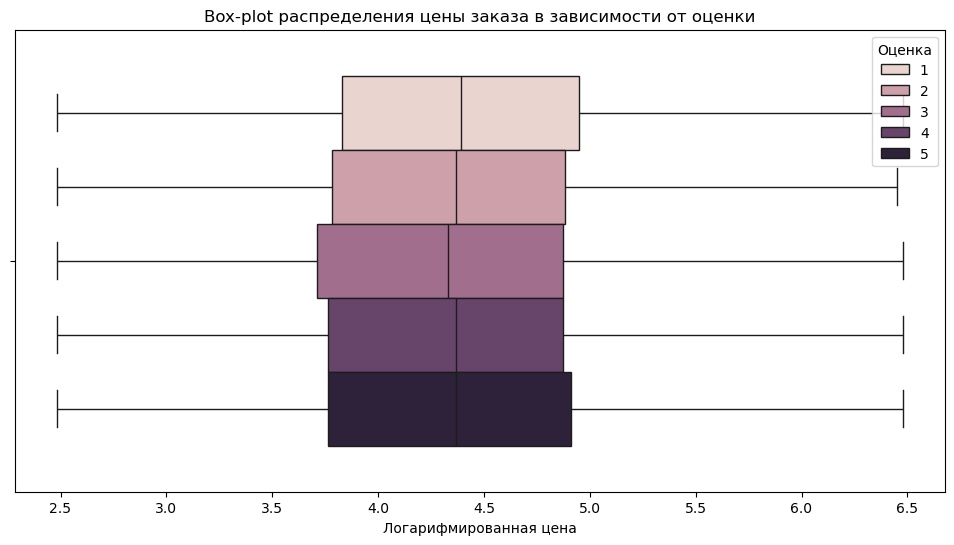

In [87]:
# Строим box-plot, чтобы убедиться в отсутствии выбросов
plt.figure(figsize=(12, 6))
sns.boxplot(data=orders_corr_filtered, x="log_price", hue="review_score")
plt.xlabel('Логарифмированная цена')
plt.title('Box-plot распределения цены заказа в зависимости от оценки')
plt.legend(title='Оценка')
plt.show()

In [89]:
# Рассчитываем корреляцию Спирмена
corr_spearman = orders_corr_filtered[['log_price', 'review_score']].corr(method='spearman')
print("Корреляция Спирмена:\n", corr_spearman)

Корреляция Спирмена:
               log_price  review_score
log_price      1.000000      0.000598
review_score   0.000598      1.000000


In [91]:
# Рассчитываем корреляцию Кендалла
corr_kendall = orders_corr_filtered[['log_price', 'review_score']].corr(method='kendall')
print("Корреляция Кендалла:\n", corr_kendall)

Корреляция Кендалла:
               log_price  review_score
log_price       1.00000       0.00046
review_score    0.00046       1.00000


### Вывод на основе корреляционного анализа:

Оба коэффициента почти нулевые, что говорит об отсутствии связи между ценой товара и его оценкой.
Клиенты не ставят систематически более высокие или низкие оценки в зависимости от стоимости заказа.
Цена не является определяющим фактором в формировании оценки.

### Использование статистического критерия для анализа зависимости оценки от цены.
##### Проделанные действия:

Используя квартильные значения (Q1, Q2, Q3), данные были разделены на 4 ценовые категории:
- Дешевые (цена ≤ Q1)
- Средне-дешевые (Q1 < цена ≤ Q2)
- Средне-дорогие (Q2 < цена ≤ Q3)
- Дорогие (цена > Q3)

In [93]:
orders_w_reviews_delivered['price'].describe()

count    95830.000000
mean       125.040425
std        188.297514
min          0.850000
25%         41.900000
50%         79.000000
75%        139.900000
max       6735.000000
Name: price, dtype: float64

In [95]:
# Определяем границы квартилей
q1 = orders_w_reviews_delivered['price'].quantile(0.25)
q2 = orders_w_reviews_delivered['price'].quantile(0.50)
q3 = orders_w_reviews_delivered['price'].quantile(0.75)

In [97]:
# Функция для присвоения ценовой категории
def categorize_price(price):
    if price <= q1:
        return 'Дешевые'
    elif q1 < price <= q2:
        return 'Средне-дешевые'
    elif q2 < price <= q3:
        return 'Средне-дорогие'
    else:
        return 'Дорогие'

# Создаем новый столбец с категориями
orders_w_reviews_delivered['price_category'] = orders_w_reviews_delivered['price'].apply(categorize_price)

##### Визуализация данных:

Построена гистограмма распределения оценок по каждой ценовой категории.

Результат показал, что в каждой группе оценки распределены одинаково, однако наблюдается неравномерность по количеству оценок — больше всего пятерок и четверок, значительно меньше троек и двоек.

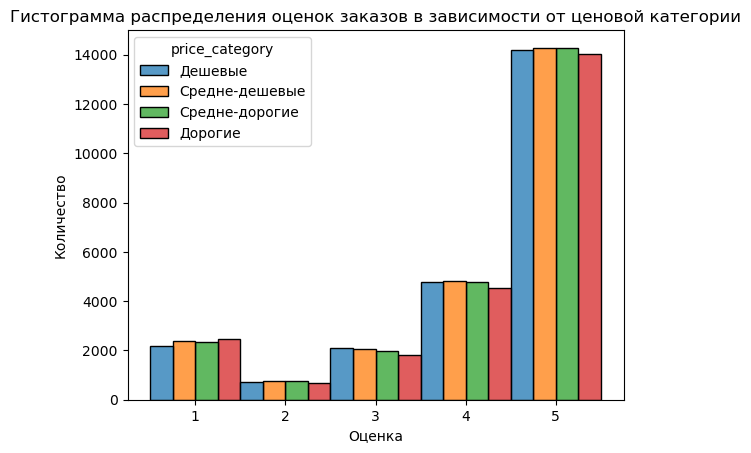

In [99]:
sns.histplot(data=orders_w_reviews_delivered, hue='price_category', x='review_score', discrete=True, multiple='dodge', hue_order=['Дешевые', 'Средне-дешевые', 'Средне-дорогие', 'Дорогие'])
plt.xlabel('Оценка')
plt.ylabel('Количество')
plt.title('Гистограмма распределения оценок заказов в зависимости от ценовой категории')
plt.show()

##### Тест Краскела-Уоллиса:

Мы применяем тест Краскела-Уоллиса, потому что он позволяет проверить, существуют ли статистически значимые различия между медианами нескольких независимых групп. В нашем случае это четыре ценовые категории товаров с оценками от 1 до 5.

**Почему мы можем применить этот тест**:
1. **Независимость групп**: Каждая ценовая категория (Дешевые, Средне-дешевые, Средне-дорогие, Дорогие) представляет собой независимую группу.
2. **Тип данных**: Оценки являются порядковыми данными (от 1 до 5), что подходит для непараметрического теста.
3. **Размер выборок**: Каждая группа содержит достаточное количество наблюдений (около 24 тыс.), что позволяет использовать статистический тест с необходимой степенью уверенности.


**Гипотезы**:

**H0:** Оценки между различными ценовыми категориями не имеют статистически значимых различий.

**H1:** Оценки между различными ценовыми категориями имеют статистически значимые различия.

In [101]:
# Сформируем четыре исследуемые группы
delivered_group_1 = orders_w_reviews_delivered[orders_w_reviews_delivered['price_category'] == 'Дешевые']['review_score']
delivered_group_2 = orders_w_reviews_delivered[orders_w_reviews_delivered['price_category'] == 'Средне-дешевые']['review_score']
delivered_group_3 = orders_w_reviews_delivered[orders_w_reviews_delivered['price_category'] == 'Средне-дорогие']['review_score']
delivered_group_4 = orders_w_reviews_delivered[orders_w_reviews_delivered['price_category'] == 'Дорогие']['review_score']

# Тест Краскела-Уоллиса
statistic_delivered, p_value_delivered = stats.kruskal(delivered_group_1, delivered_group_2, delivered_group_3, delivered_group_4)
print(f"Статистика: {statistic_delivered}, p-значение: {p_value_delivered}")

Статистика: 1.8099800678010562, p-значение: 0.6127655730810184


### Вывод на основе применения статистического критерия:

Полученное p-значение (0.612) больше уровня значимости 0.05, поэтому мы не отвергаем нулевую гипотезу и делаем вывод, что ценовая категория не влияет на оценку товара в статистически значимой степени.

## 5. Анализ влияния категории товара на его оценку

### Подготовка данных к анализу

In [103]:
# Объединяем DF с видами товаров с наименованиями категорий на английском языке
# Консервативно используем left join, чтобы сохранить все наименования категорий
products_eng = products.merge(right=eng_category_name, how='left', on='product_category_name')
products_eng.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm,product_category_name_english
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0,art
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0,baby
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0,housewares


In [105]:
# Видим, что у некоторых категорий на португальском отсутствует английский перевод
products_eng[products_eng['product_category_name_english'].isnull()]['product_category_name'].value_counts()

product_category_name
portateis_cozinha_e_preparadores_de_alimentos    10
pc_gamer                                          3
Name: count, dtype: int64

In [107]:
# Добавляем английский перевод вручную
products_eng.loc[products_eng['product_category_name'] == 'portateis_cozinha_e_preparadores_de_alimentos', 'product_category_name_english'] = 'portable_kitchen_and_food_preparers'
products_eng.loc[products_eng['product_category_name'] == 'pc_gamer', 'product_category_name_english'] = 'pc_gamer'

In [109]:
# Объединяем таблицу с заказами с наименованиями категорий товаров
order_items_category = order_items.merge(right=products_eng[['product_id', 'product_category_name_english']], how='inner', on='product_id')
order_items_category.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


In [111]:
# Удаляем пустые значения
order_items_category = order_items_category.dropna(subset=['product_category_name_english'])

In [113]:
order_items_category.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools


Ввиду того, что в одном заказе может быть несколько товаров из разных категорий, следует применить фильтрацию данных. Подходов может быть несколько:
- выбрать наиболее часто встречающуюся категорию в заказе;
- использовать категорию самого дорогого товара в заказе;
- оставить только заказы с одним товаром.

Если внимательно посмотреть на DataFrame, то можно заметить, что часто встречается ситуация, где в одном заказе присутствуют товары из одной категории (с одинаковой или разной стоимостью). Поэтому для подготовки данных к анализу будет выбран совмещенный подход: очистка данных, основанная на категориях и цене.

In [115]:
# Сортируем DF по номеру заказа, категории и цене.
order_items_category_sorted = order_items_category.sort_values(by=['order_id', 'product_category_name_english', 'price'], ascending=[True, True, False])

In [117]:
# Удаляем дубликаты следующим образом: внутри каждого заказа, внутри каждой категории оставляем только самый дорогой товар.
# Оставляем самый дорогой товар из предположения, что именно он оказывает более сильное влияние на оценку.
order_items_category_filtered = order_items_category_sorted.drop_duplicates(subset=['order_id', 'product_category_name_english'], keep='first')

In [119]:
# Продолжая руководствоваться принципом, что самая большая стоимость влияет на оценку сильнее, оставляем самую дорогую категорию в одном заказе.
final_category = order_items_category_filtered.drop_duplicates(subset=['order_id'], keep='first')[['order_id', 'product_category_name_english']]

In [121]:
final_category

,order_id,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,pet_shop
2,000229ec398224ef6ca0657da4fc703e,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools
...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,housewares
112646,fffcd46ef2263f404302a634eb57f7eb,computers_accessories
112647,fffce4705a9662cd70adb13d4a31832d,sports_leisure
112648,fffe18544ffabc95dfada21779c9644f,computers_accessories


Как и в случае изучения влияния стоимости заказа на оценку, будем руководствоваться принципом, что только после использования товара, клиент способен поставить объективную оценку. Поэтому будем анализировать только те заказы, которые были доставлены.

In [123]:
# Оставляем только доставленные заказы
orders_w_reviews_delivered_2 = orders_w_reviews[~orders_w_reviews['order_delivered_customer_date'].isnull()]

In [125]:
orders_w_reviews_delivered_2

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,is_negative,is_delayed
30661,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1,2016-10-06 00:00:00,0,1
46389,9aa3197e4887919fde0307fc23601d7a,31a4ecf0bd3ea9436b7132bac1a1bdb3,delivered,2016-10-06 13:16:56,2016-10-06 16:06:59,2016-10-14 18:08:17,2016-10-17 19:08:17,2016-11-28,b2d5d8db2a841d27a72e4c06c6212368,4,2016-10-15 00:00:00,0,0
27449,e2144124f98f3bf46939bc5183104041,bd0342f59a3b8ddc416bd048b2b5d0fb,delivered,2016-10-06 20:06:26,2016-10-08 11:00:24,2016-10-12 11:00:25,2016-10-15 11:00:25,2016-11-28,743d98b1a4782f0646898fc915ef002a,4,2016-10-15 00:00:00,0,0
13705,b8b9d7046c083150cb5360b83a8ebb51,ec271753df25bad1135a375ed6d7f113,delivered,2016-10-06 12:51:54,2016-10-06 16:05:19,2016-10-15 12:24:17,2016-10-18 13:24:17,2016-11-28,53752edb26544dd41c1209f582c9c589,5,2016-10-16 01:00:00,0,0
4462,85841af0d94e5d0cd3a9c0e42e565b74,603dd05a409bcfe63ca922996c72bdfb,delivered,2016-10-05 22:39:46,2016-10-06 16:03:32,2016-10-10 16:03:33,2016-10-13 16:03:33,2016-11-25,b2fc2fac36fdef519925b2f55a95d8e4,5,2016-10-18 00:00:00,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
67515,b0e1b07dae953c6056f02e040a2e596c,0bf392eae6659457dfc09ca7c3ea9b42,delivered,2018-08-23 09:51:51,2018-08-23 10:04:50,2018-08-24 11:46:00,2018-08-30 22:41:43,2018-09-20,1fc8080746fc57430b3cbcea94d2a201,5,2018-08-31 00:00:00,0,0
39339,7c67a9f94c58c5b1c1a40953151fbccd,e3ee993f5b68f60fdda5d3fb16299fd2,delivered,2018-08-26 19:01:18,2018-08-26 19:15:16,2018-08-27 11:25:00,2018-08-30 12:07:55,2018-09-18,eaaa41bee6848e426757573b8a2b9b5e,5,2018-08-31 00:00:00,0,0
98359,bda15d43b16684fa4eff328a7db33d8b,6eff0b0388f0e0829bd659d12e168828,delivered,2018-08-28 19:44:25,2018-08-28 20:04:13,2018-08-29 14:27:00,2018-08-30 20:53:55,2018-09-11,c20d8bf50b6c2130c91457ad1279eba9,5,2018-08-31 00:00:00,0,0
21070,96a056333b6517f334ac928d91dc7e15,59fb48431c37f2c42e245df4cdace347,delivered,2018-08-12 21:12:46,2018-08-12 21:25:16,2018-08-24 07:18:00,2018-08-30 12:24:49,2018-09-27,9e97d569e91cbbeb9d2e0695f47c6220,5,2018-08-31 00:00:00,0,0


In [127]:
# Объединяем категории с заказами, чтобы в анализе пользоваться именно этим DF
orders_w_reviews_categories = orders_w_reviews_delivered_2.merge(right=final_category, on='order_id', how='inner')
orders_w_reviews_categories

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,review_id,review_score,review_creation_date,is_negative,is_delayed,product_category_name_english
0,bfbd0f9bdef84302105ad712db648a6c,86dc2ffce2dfff336de2f386a786e574,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,2016-11-09 07:47:38,2016-10-04,6916ca4502d6d3bfd39818759d55d536,1,2016-10-06 00:00:00,0,1,health_beauty
1,9aa3197e4887919fde0307fc23601d7a,31a4ecf0bd3ea9436b7132bac1a1bdb3,delivered,2016-10-06 13:16:56,2016-10-06 16:06:59,2016-10-14 18:08:17,2016-10-17 19:08:17,2016-11-28,b2d5d8db2a841d27a72e4c06c6212368,4,2016-10-15 00:00:00,0,0,fashion_bags_accessories
2,e2144124f98f3bf46939bc5183104041,bd0342f59a3b8ddc416bd048b2b5d0fb,delivered,2016-10-06 20:06:26,2016-10-08 11:00:24,2016-10-12 11:00:25,2016-10-15 11:00:25,2016-11-28,743d98b1a4782f0646898fc915ef002a,4,2016-10-15 00:00:00,0,0,baby
3,b8b9d7046c083150cb5360b83a8ebb51,ec271753df25bad1135a375ed6d7f113,delivered,2016-10-06 12:51:54,2016-10-06 16:05:19,2016-10-15 12:24:17,2016-10-18 13:24:17,2016-11-28,53752edb26544dd41c1209f582c9c589,5,2016-10-16 01:00:00,0,0,electronics
4,85841af0d94e5d0cd3a9c0e42e565b74,603dd05a409bcfe63ca922996c72bdfb,delivered,2016-10-05 22:39:46,2016-10-06 16:03:32,2016-10-10 16:03:33,2016-10-13 16:03:33,2016-11-25,b2fc2fac36fdef519925b2f55a95d8e4,5,2016-10-18 00:00:00,0,0,furniture_decor
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94501,b0e1b07dae953c6056f02e040a2e596c,0bf392eae6659457dfc09ca7c3ea9b42,delivered,2018-08-23 09:51:51,2018-08-23 10:04:50,2018-08-24 11:46:00,2018-08-30 22:41:43,2018-09-20,1fc8080746fc57430b3cbcea94d2a201,5,2018-08-31 00:00:00,0,0,auto
94502,7c67a9f94c58c5b1c1a40953151fbccd,e3ee993f5b68f60fdda5d3fb16299fd2,delivered,2018-08-26 19:01:18,2018-08-26 19:15:16,2018-08-27 11:25:00,2018-08-30 12:07:55,2018-09-18,eaaa41bee6848e426757573b8a2b9b5e,5,2018-08-31 00:00:00,0,0,health_beauty
94503,bda15d43b16684fa4eff328a7db33d8b,6eff0b0388f0e0829bd659d12e168828,delivered,2018-08-28 19:44:25,2018-08-28 20:04:13,2018-08-29 14:27:00,2018-08-30 20:53:55,2018-09-11,c20d8bf50b6c2130c91457ad1279eba9,5,2018-08-31 00:00:00,0,0,cool_stuff
94504,96a056333b6517f334ac928d91dc7e15,59fb48431c37f2c42e245df4cdace347,delivered,2018-08-12 21:12:46,2018-08-12 21:25:16,2018-08-24 07:18:00,2018-08-30 12:24:49,2018-09-27,9e97d569e91cbbeb9d2e0695f47c6220,5,2018-08-31 00:00:00,0,0,music


### Проведение анализа

In [129]:
orders_w_reviews_categories['review_score'].describe()

count    94506.000000
mean         4.157313
std          1.283275
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: review_score, dtype: float64

In [131]:
# Рассчитаем основные описательные статистики для каждой категории товара
category_reviews_grouped = orders_w_reviews_categories.groupby('product_category_name_english', as_index=False)['review_score'].agg(['count', 'mean', 'std', 'median', 'min', 'max', 'quantile'])
category_reviews_grouped_sorted = category_reviews_grouped.sort_values('count', ascending=False)

In [133]:
category_reviews_grouped_sorted.head(21)

,product_category_name_english,count,mean,std,median,min,max,quantile
7,bed_bath_table,9158,4.001856,1.369529,5.0,1,5,5.0
43,health_beauty,8575,4.231487,1.247133,5.0,1,5,5.0
67,sports_leisure,7429,4.238255,1.232103,5.0,1,5,5.0
15,computers_accessories,6491,4.081960,1.337062,5.0,1,5,5.0
39,furniture_decor,6150,4.075772,1.345060,5.0,1,5,5.0
49,housewares,5630,4.207815,1.235817,5.0,1,5,5.0
72,watches_gifts,5413,4.129503,1.305669,5.0,1,5,5.0
70,telephony,4045,4.059085,1.308014,5.0,1,5,5.0
5,auto,3791,4.145080,1.285417,5.0,1,5,5.0
71,toys,3725,4.246711,1.235688,5.0,1,5,5.0


**Корреляционная тепловая карта (Heatmap)**

Мы решили визуализировать распределение количества заказов по оценкам для различных категорий товаров. Однако в датасете более 70 категорий, что делает тепловую карту трудно читаемой.  

Чтобы улучшить восприятие данных, мы выбрали топ-21 категорию с наибольшим количеством заказов. Это позволяет сосредоточиться на наиболее значимых данных и избежать перегруженности графика.  

На тепловой карте можно увидеть, какие категории товаров чаще получают высокие или низкие оценки. Это помогает выявить возможные проблемы в качестве товаров или их доставки.

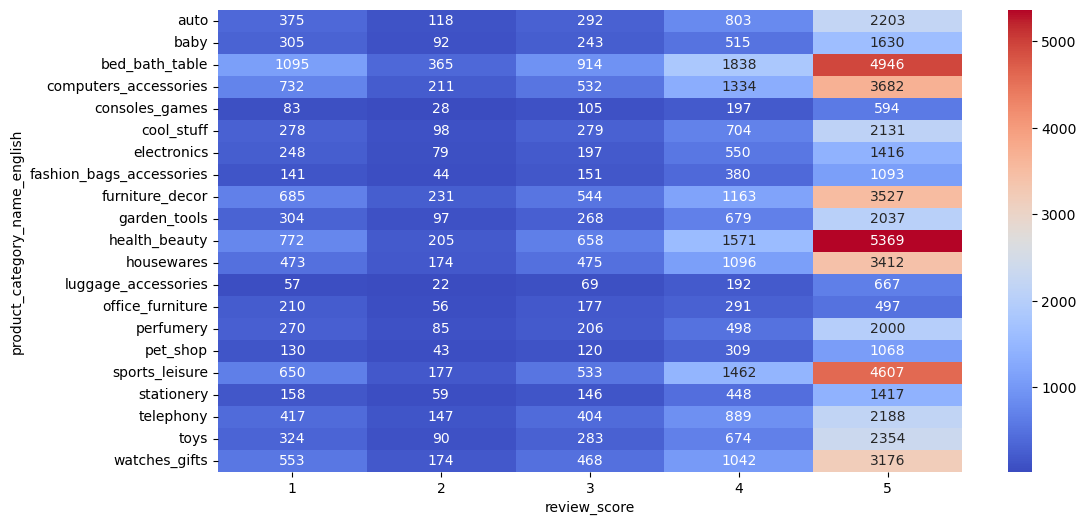

In [135]:
top_categories = orders_w_reviews_categories['product_category_name_english'].value_counts().nlargest(21).index
filtered_data = orders_w_reviews_categories[orders_w_reviews_categories['product_category_name_english'].isin(top_categories)]

category_review_pivot = filtered_data.pivot_table(index='product_category_name_english', 
                                                  columns='review_score', 
                                                  values='order_id', 
                                                  aggfunc='count', 
                                                  fill_value=0)

plt.figure(figsize=(12, 6))  # Увеличим размер графика для удобочитаемости
sns.heatmap(category_review_pivot, cmap='coolwarm', annot=True, fmt="d")
plt.xticks(rotation=0)  # Чтобы подписи осей не накладывались
plt.yticks(rotation=0)
plt.show()

In [137]:
category_reviews_grouped_sorted[category_reviews_grouped_sorted['mean'] < 4]

,product_category_name_english,count,mean,std,median,min,max,quantile
57,office_furniture,1231,3.657189,1.465965,4.0,1,5,4.0
4,audio,345,3.840580,1.513728,5.0,1,5,5.0
47,home_confort,342,3.961988,1.420943,5.0,1,5,5.0
34,fixed_telephony,209,3.966507,1.408705,5.0,1,5,5.0
19,construction_tools_safety,155,3.980645,1.430062,5.0,1,5,5.0
30,fashion_male_clothing,105,3.819048,1.585881,5.0,1,5,5.0
41,furniture_mattress_and_upholstery,37,3.891892,1.486678,5.0,1,5,5.0
27,fashio_female_clothing,36,3.916667,1.338976,4.5,1,5,4.5
23,diapers_and_hygiene,25,3.960000,1.337909,4.0,1,5,4.0
46,home_comfort_2,22,3.954545,1.463111,5.0,1,5,5.0


### Выводы из описательных статистик:
1. Средняя оценка большинства категорий держится в узком диапазоне (3.9–4.3). Это намекает на слабую связь между категорией товара и оценкой.
2. Экстремально низких средних почти нет. Даже если мы попытаемся найти статистически значимое различие между оценками в категориях `office_furniture` со средней оценкой `3.657` и схожей по количеству наблюдений `consoles_games` со средней `4.183`, то это не будет означать, что в остальных категориях наблюдаются аналогичные различия. 
3. Распределение оценок смещено в сторону высоких баллов (5 и 4). Этот фактор влияет на применимость тестов.
4. Разный размер выборок (от 2 до 9158). Многие статистические тесты чувствительны к дисбалансу.

**Сложности дальнейшего анализа:**

1. Маленькая вариативность оценок может привести к незначимым различиям между категориями.
2. Множественное тестирование – при сравнении множества категорий вероятность ложноположительных результатов увеличивается.  
3. Большие категории (с 1000+ отзывов) доминируют, а малые категории (с <100 отзывов) дают шум.
4. Распределение оценок неравномерно, ANOVA не подходит, Краскел-Уоллис может быть ненадежен.

**Итоговые выводы:**

1. Мы не будем проводить дальнейшие сравнения между категориями, так как полученные результаты не позволяют сделать надежный вывод о глобальном влиянии категории товара на оценку заказа.
2. Для более точного анализа можно рассмотреть многофакторные модели или проанализировать другие потенциальные зависимости (что сделано ранее).

# Итоговые выводы:

В рамках данного исследования мы провели анализ факторов, влияющих на оценку заказа, используя данные e-commerce. Мы рассмотрели несколько ключевых гипотез, связанных с различными аспектами пользовательского опыта.

**Краткое summary по анализу факторов, потенциально влияющих на оценку:**
1. Статус заказа и его влияние на оценку

Мы установили, что существует статистически значимое различие в оценках между доставленными и недоставленными заказами.
Недоставленные заказы получают значительно более низкие оценки, что может свидетельствовать о сильном влиянии успешности выполнения заказа на удовлетворенность клиентов.

2. Задержка доставки и ее влияние на оценку

Анализ показал, что увеличение задержки доставки статистически значимо связано со снижением оценки заказа.
Это подтверждает гипотезу о важности своевременной доставки для формирования положительного пользовательского опыта.

3. Стоимость заказа и ее влияние на оценку

Анализ с использованием корреляционных методов не выявил значимой связи между ценой заказа и его оценкой.
Разделение на ценовые категории также не дало статистически значимых различий, что указывает на слабое влияние стоимости заказа на пользовательские оценки.

4. Категория товара и ее влияние на оценку

Мы протестировали гипотезу о влиянии категории товара на оценку заказа.
Несмотря на потенциальные статистически значимые различия между отдельными категориями, мы пришли к выводу, что это не позволяет нам делать обобщающие выводы о влиянии категории на оценку заказа в целом.

**Итог:**

Таким образом, анализ показал, что статус заказа и задержка доставки являются важными факторами, влияющими на пользовательскую оценку, тогда как стоимость заказа и категория товара не продемонстрировали значимого эффекта.

Полученные выводы могут быть полезны для бизнеса:

- Улучшение логистических процессов и контроль сроков доставки могут повысить пользовательскую удовлетворенность.
- Компаниям следует уделять особое внимание клиентам с проблемными заказами, например, предоставляя компенсации или бонусы за задержки.

Этот анализ демонстрирует подход к изучению пользовательских оценок с применением статистических методов, что может быть полезно в дальнейшем для более детального изучения факторов, влияющих на лояльность клиентов.